In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from pathlib import Path
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix


current_dir = Path(os.getcwd())
train_dir = r"C:\Users\ayse\Desktop\bootcamp_project_yzta\Dataset\train"
test_dir = r"C:\Users\ayse\Desktop\bootcamp_project_yzta\Dataset\test"

# Parametreler
img_height, img_width = 128, 128
batch_size = 32
# Görselleri yükle (Data + Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,          # Hafif döndürme
    width_shift_range=0.1,      # Yatay kaydırma
    height_shift_range=0.1,     # Dikey kaydırma
    horizontal_flip=True,       # Yatay çevirme
    zoom_range=0.1,             # Yakınlaştırma
    brightness_range=[0.8, 1.2], # Parlaklık değişimi
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Sınıf sayısını al
num_classes = len(train_generator.class_indices)
print(f"Toplam sınıf sayısı: {num_classes}")

# Transfer learning modeli
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

base_model.trainable = False

# Basit Neural Network Modeli
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# CNN Modeli
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Found 2092 images belonging to 19 classes.
Found 517 images belonging to 19 classes.
Found 895 images belonging to 19 classes.
Toplam sınıf sayısı: 19


C:\Users\ayse\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Transfer Learning modeli eğitiliyor (class weight olmadan)...
Class weight olmadan eğitim başlıyor...


C:\Users\ayse\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 610ms/step - accuracy: 0.2836 - loss: 2.5557 - val_accuracy: 0.3250 - val_loss: 2.3399 - learning_rate: 0.0010
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - accuracy: 0.2960 - loss: 2.4349 - val_accuracy: 0.3250 - val_loss: 2.3387 - learning_rate: 0.0010
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 408ms/step - accuracy: 0.3022 - loss: 2.4124 - val_accuracy: 0.3250 - val_loss: 2.3287 - learning_rate: 0.0010
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - accuracy: 0.3265 - loss: 2.3740 - val_accuracy: 0.3250 - val_loss: 2.3530 - learning_rate: 0.0010
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 285ms/step - accuracy: 0.3244 - loss: 2.3946 - val_accuracy: 0.3250 - val_loss: 2.3235 - learning_rate: 0.0010
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - accuracy: 0.3029 - loss: 2.4148 - val_accuracy: 0.3250 - val_loss: 2.3275 - learning_rate: 0.0010
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - accuracy: 0.3107 - loss: 2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


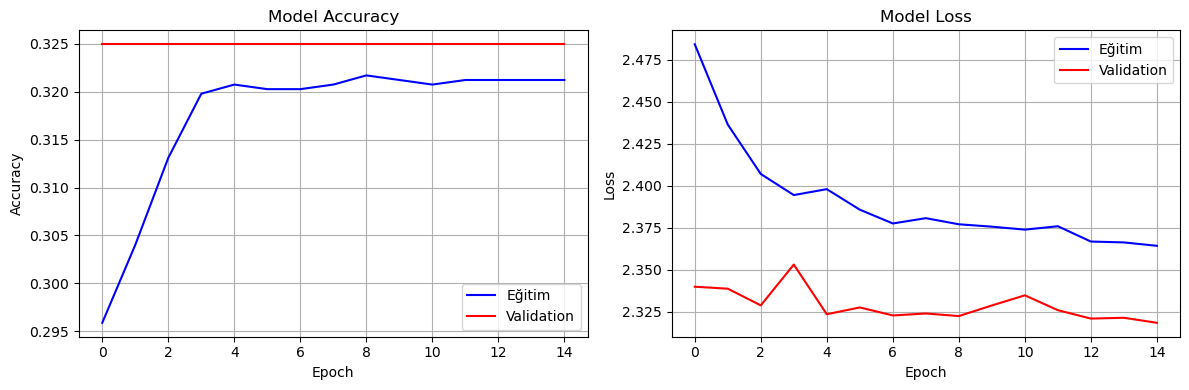

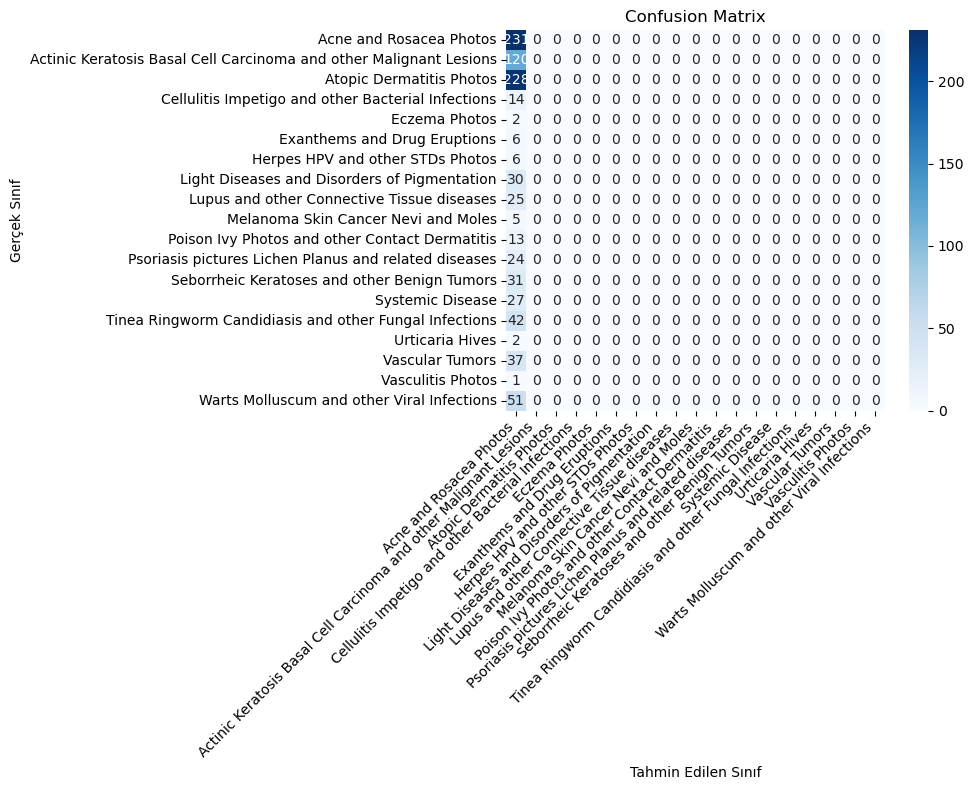


=== PERFORMANS ÖZETİ ===
Son epoch train accuracy: 0.3212
Son epoch validation accuracy: 0.3250
En iyi validation accuracy: 0.3250
Test accuracy: 0.2581
Overfitting gap: -0.0037
✅ İyi genelleme

✅ Tüm süreç tamamlandı!


In [2]:

# ADIM 1: Önce class weight olmadan çalıştıralım
print("Transfer Learning modeli eğitiliyor (class weight olmadan)...")

# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np

# Define callbacks with modified checkpoint configuration
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'best_model.weights.h5',  # <-- dosya uzantısı düzeltildi
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# Training the model
print("Class weight olmadan eğitim başlıyor...")
history_transfer = transfer_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("✅ İlk eğitim tamamlandı!")

# ADIM 2: Class weight'i güvenli şekilde hesapla
print("\nClass weight hesaplanıyor...")

# Numpy array'e çevir
train_classes = np.array(train_generator.classes)
unique_classes = np.unique(train_classes)

# Manuel class weight hesaplama (daha güvenli)
class_weight_dict = {}
total_samples = len(train_classes)
n_classes = len(unique_classes)

for class_idx in unique_classes:
    class_count = np.sum(train_classes == class_idx)
    weight = total_samples / (n_classes * class_count)
    class_weight_dict[int(class_idx)] = float(weight)

print(f"Hesaplanan class weight'ler: {class_weight_dict}")

# ADIM 3: Class weight ile yeniden eğit (isteğe bağlı)
print("\nClass weight ile fine-tuning...")

# Import Path and define model directory
from pathlib import Path
model_dir = Path('models')
model_dir.mkdir(exist_ok=True)

# Yeni model checkpoint
checkpoint_balanced = ModelCheckpoint(
    str(model_dir / 'balanced_transfer_model.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Daha düşük learning rate ile fine-tune
transfer_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Daha düşük lr
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Convert the tensor values to regular Python floats
class_weight_dict = {
    i: float(weight.numpy()) if hasattr(weight, 'numpy') else float(weight)
    for i, weight in class_weight_dict.items()
}



# Now use the converted weights in model.fit()
history_balanced = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint_balanced],
    verbose=1
)

print("✅ Balanced eğitim tamamlandı!")

# ADIM 4: Sonuçları değerlendir
print("\n=== MODEL DEĞERLENDİRME ===")

# Test verisi üzerinde değerlendirme
test_loss, test_accuracy = transfer_model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix için tahminler
print("Tahminler hesaplanıyor...")
test_generator.reset()  # Generator'ı sıfırla
y_pred = transfer_model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Sınıf isimleri
class_names = list(train_generator.class_indices.keys())

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
try:
    report = classification_report(y_true, y_pred_classes, target_names=class_names)
    print(report)
except Exception as e:
    print(f"Rapor oluşturulurken hata: {e}")
    print("Basit accuracy hesaplanıyor...")
    accuracy = np.mean(y_true == y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")

# Görselleştirme
print("\nGörselleştirme...")
try:
    # Eğitim grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history_transfer.history['accuracy'], label='Eğitim', color='blue')
    plt.plot(history_transfer.history['val_accuracy'], label='Validation', color='red')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_transfer.history['loss'], label='Eğitim', color='blue')
    plt.plot(history_transfer.history['val_loss'], label='Validation', color='red')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Gerçek Sınıf')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Görselleştirme hatası: {e}")

# Model performans özeti
print("\n=== PERFORMANS ÖZETİ ===")
try:
    final_train_acc = history_transfer.history['accuracy'][-1]
    final_val_acc = history_transfer.history['val_accuracy'][-1]
    best_val_acc = max(history_transfer.history['val_accuracy'])

    print(f"Son epoch train accuracy: {final_train_acc:.4f}")
    print(f"Son epoch validation accuracy: {final_val_acc:.4f}")
    print(f"En iyi validation accuracy: {best_val_acc:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    overfitting_gap = final_train_acc - final_val_acc
    print(f"Overfitting gap: {overfitting_gap:.4f}")

    if overfitting_gap > 0.15:
        print("⚠️  Güçlü overfitting - daha fazla regularization gerekli")
    elif overfitting_gap > 0.1:
        print("🔄 Orta seviye overfitting - kabul edilebilir")
    else:
        print("✅ İyi genelleme")

except Exception as e:
    print(f"Performans analizi hatası: {e}")

print("\n✅ Tüm süreç tamamlandı!")

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       231
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00       228
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        42
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


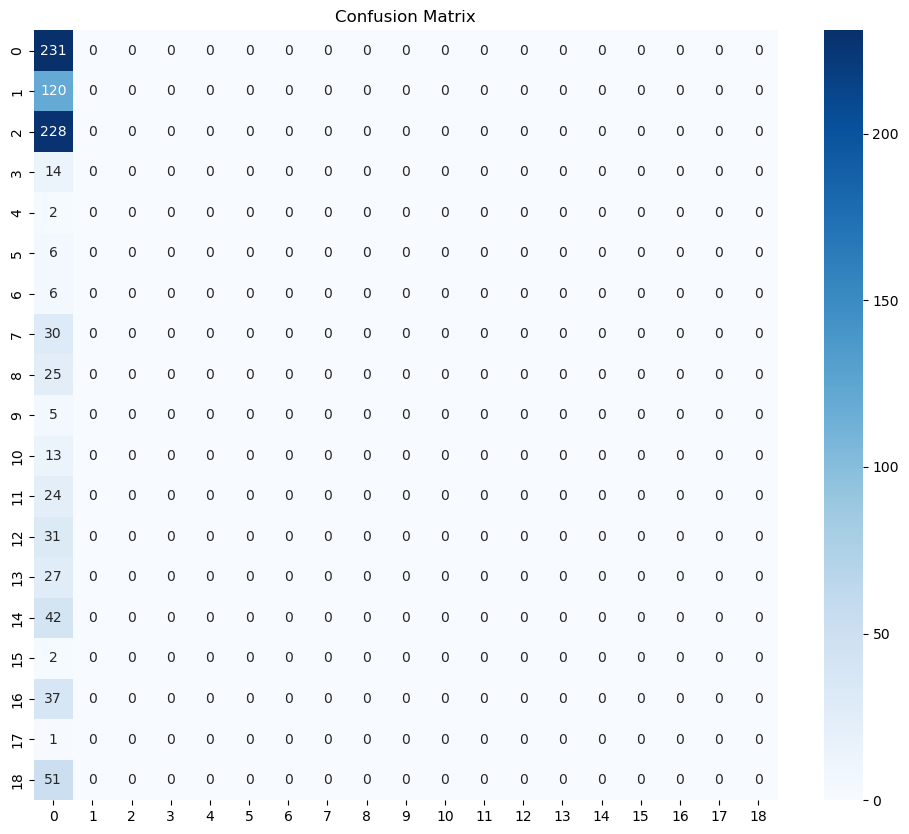

In [3]:
y_pred = transfer_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Sınıflandırma raporu
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [4]:
def predict_disease_probabilities(image_path, model, class_names):
    """
    Bir görüntü için hastalık olasılıklarını döndürür
    """
    # Görüntüyü yükle ve hazırla
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Tahmin yap
    predictions = model.predict(img_array)

    # Sınıf adları ve olasılıkları eşleştir
    disease_probabilities = {}
    for i, class_name in enumerate(class_names):
        disease_probabilities[class_name] = float(predictions[0][i])

    # Olasılığa göre sırala
    sorted_diseases = sorted(disease_probabilities.items(),
                           key=lambda x: x[1], reverse=True)

    return sorted_diseases

In [5]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sınıflar: {class_names}")

# Bir test görüntüsü üzerinde örnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalık Olasılıkları:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sınıflar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Hastalık Olasılıkları:
Acne and Rosacea Photos: %11.79
Light Diseases and Disorders of Pigmentation: %8.16
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: %7.92
Warts Molluscum and other Vi

In [9]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sınıflar: {class_names}")

# Bir test görüntüsü üzerinde örnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalık Olasılıkları:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sınıflar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Hastalık Olasılıkları:
Acne and Rosacea Photos: %12.82
Light Diseases and Disorders of Pigmentation: %8.86
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: %8.22
Warts Molluscum and other 

In [10]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sınıflar: {class_names}")

# Bir test görüntüsü üzerinde örnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalık Olasılıkları:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sınıflar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Hastalık Olasılıkları:
Acne and Rosacea Photos: %12.82
Light Diseases and Disorders of Pigmentation: %8.86
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: %8.22
Warts Molluscum and other 